In [27]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_seq_items = 2000
import numpy as np

In [4]:
df = pd.read_csv('fotmob_odds_form_df.csv', index_col = [0])

In [5]:
col_names = df.columns
col_names

Index(['expected_goals_(xg)_diff', 'total_shots_diff', 'big_chances_diff',
       'big_chances_missed_diff', 'accurate_passes_diff',
       'accurate_passes_percentage_diff', 'fouls_committed_diff',
       'offsides_diff', 'corners_diff', 'shots_off_target_diff',
       'shots_on_target_diff', 'blocked_shots_diff', 'hit_woodwork_diff',
       'shots_inside_box_diff', 'shots_outside_box_diff', 'xg_open_play_diff',
       'xg_set_play_diff', 'xg_on_target_(xgot)_diff', 'passes_diff',
       'own_half_diff', 'opposition_half_diff', 'accurate_long_balls_diff',
       'accurate_long_balls_percentage_diff', 'accurate_crosses_diff',
       'accurate_crosses_percentage_diff', 'throws_diff', 'yellow_cards_diff',
       'red_cards_diff', 'tackles_won_diff', 'tackles_won_percentage_diff',
       'interceptions_diff', 'blocks_diff', 'clearances_diff',
       'keeper_saves_diff', 'duels_won_diff', 'ground_duels_won_diff',
       'ground_duels_won_percentage_diff', 'aerial_duels_won_diff',
       'a

In [6]:
threshold = 5
df_dropped = df.dropna(thresh=df.shape[1] - threshold + 1)
df = df.fillna(0)

In [7]:
qual_df = df.select_dtypes(include='object')

df = df.select_dtypes(include=['int', 'float'])

In [8]:
# non-penalty xg

df['np_xg_diff'] = df['expected_goals_(xg)_diff'] - df['xg_penalty_diff']
# efficiency metrics
df['efficiency_metric_diff'] = df['expected_goals_(xg)_diff'] / df['total_shots_diff']
# aggression factor
df['aggression_factor_diff'] = df['fouls_committed_diff'] + df['yellow_cards_diff'] + df['red_cards_diff']
# offensive/defensive balance
df['off_def_balance_diff'] = df['tackles_won_diff'] - df['successful_dribbles_diff']
# overall form difference
df['overall_form_diff'] = df['home_form_points_gained'] - df['away_form_points_gained']
# form efficiency
df['home_form_efficiency'] = df['home_form_goals_scored'] / df['home_form_goals_conceded']
df['away_form_efficiency'] = df['away_form_goals_scored'] / df['away_form_goals_conceded']
# shot quality
df['shot_quality'] = df['np_xg_diff'] / df['total_shots_diff']
# non-penalty xg conversion ratio
df['np_xg_conversion_ratio'] = df['score_diff'] / df['np_xg_diff']
# xg on target ratio
df['shot_quality_on_target'] = df['xg_on_target_(xgot)_diff'] / df['shots_on_target_diff']
# shot quality
df['xg_shot_quality'] = df['xg_on_target_(xgot)_diff'] / df['expected_goals_(xg)_diff']
# open-play xg efficiency
df['open_play_xg_efficiency'] = df['xg_open_play_diff'] / df['total_shots_diff']
# odds variability
df['odds_variability'] = df['std_0'] + df['std_1'] + df['std_2']
# predictability index
df['predictability_index'] = 1 / df['cv_odds']
# team discipline
df['discipline_score'] = df['fouls_committed_diff'] / (df['yellow_cards_diff'] + 3*df['red_cards_diff'])
# set-play efficiency
df['set_play_efficiency'] = df['xg_set_play_diff'] / (df['corners_diff'] + df['accurate_long_balls_diff'])
# possession efficiency
df['possession_efficiency'] = df['np_xg_diff'] / df['posession_diff']
# goal conversion ratio
df['goal_conversion_ratio'] = df['score_diff'] / df['expected_goals_(xg)_diff']
# possession conversion
df['possession_conversion'] = df['expected_goals_(xg)_diff'] / df['posession_diff']
# possession territory
df['possession_territory'] = df['own_half_diff'] / df['opposition_half_diff']
# possession effectiveness
df['possession_effectiveness'] = df['big_chances_diff'] / df['posession_diff']
# possession discipline
df['possession_discipline'] = df['fouls_committed_diff'] / df['posession_diff']
# pass efficiency
df['pass_efficiency'] = df['total_shots_diff'] / df['passes_diff']
# xg per pass
df['xg_per_pass'] = df['expected_goals_(xg)_diff'] / df['passes_diff']
# crossing efficiency
df['crossing_efficiency'] = df['shots_on_target_diff'] / df['accurate_crosses_diff']
# crossing xg efficiency
df['crossing_xg_efficiency'] = df['expected_goals_(xg)_diff'] / df['accurate_crosses_diff']
# opposition half pass efficiency
df['opposition_half_pass_efficiency'] = df['total_shots_diff'] / df['opposition_half_diff']
# big chance creation
df['big_chance_creation'] = df['big_chances_diff']/df['total_shots_diff']
df = df.replace([np.inf, -np.inf], np.nan)

# handle nan values (use an appropriate strategy here, fill with 0 as an example)
df = df.fillna(0)

Accuracy:  0.5945330296127562


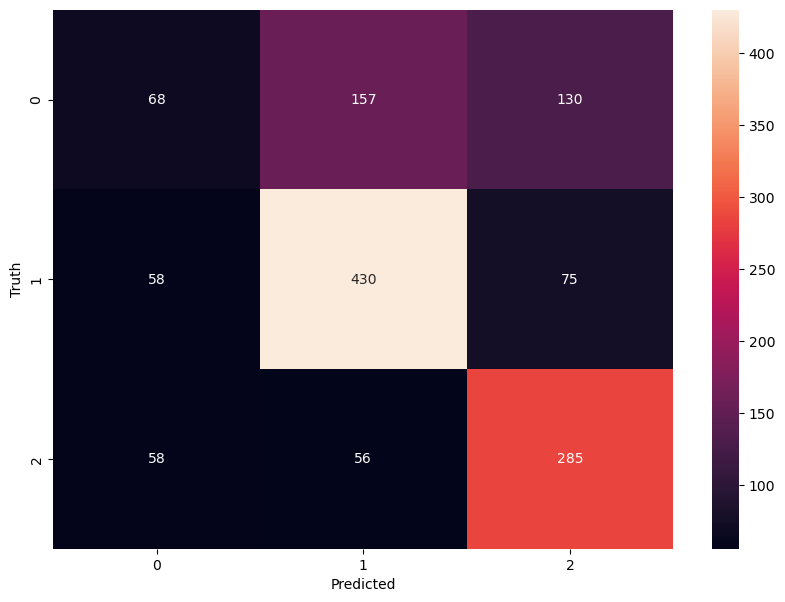

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
X = df.drop('target', axis=1)
y = df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Initialize the classifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


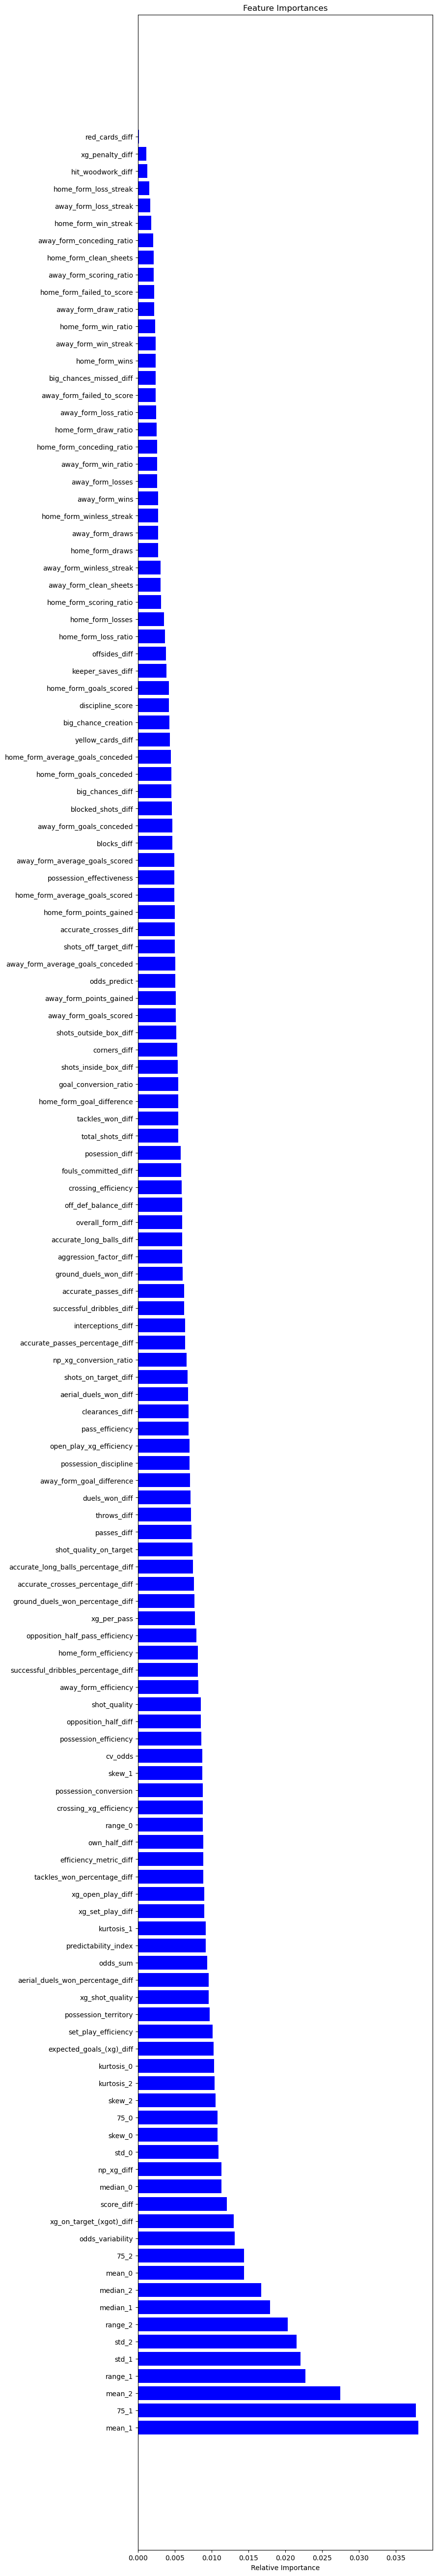

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, len(indices)/2))
plt.subplots_adjust(left=0.3)

plt.title('feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('relative Importance')
plt.gca().invert_yaxis()
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

X = df.drop(columns=['target'])
y = df['target']

model = LogisticRegression(max_iter = 10000)
sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction='backward')
sfs.fit(X, y)

# Print the names of the most important features
for feature_list_index in sfs.get_support(indices=True):
    print(X.columns[feature_list_index])

KeyboardInterrupt: 

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

X = df.drop(columns=['target'])
y = df['target']

model = LogisticRegression(max_iter=10000)

features = list(X.columns)
selected_features = []

for _ in tqdm(range(10)):  # We want to select 25 features
    best_score = 0
    best_feature = None
    
    for feature in features:
        candidate_features = selected_features + [feature]
        score = cross_val_score(model, X[candidate_features], y, cv=5).mean()  
        # Using cross_val_score here is just an example. 
        # You might need to replace this line with appropriate validation method.
        
        if score > best_score:
            best_score = score
            best_feature = feature

    features.remove(best_feature)
    selected_features.append(best_feature)

print(selected_features)

100%|███████████████████████████████████████████| 10/10 [03:10<00:00, 19.05s/it]

['odds_predict', 'median_1', 'cv_odds', 'accurate_passes_percentage_diff', 'accurate_crosses_percentage_diff', 'home_form_average_goals_scored', 'home_form_draws', 'opposition_half_pass_efficiency', 'xg_per_pass', 'home_form_goals_scored']
